## Rohan Singla  300322754 

### Prediction of Car driver accepting the promotion Food coupon

####  We are building a Coupon Recommendation system based on the Data collected by amazon

### Importing required libraries and Performing Data Preparation

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
df=pd.read_csv(r'in-vehicle-coupon-recommendation.csv')
data=df
#Reading the file and copying the dataframe

In [3]:
df.head()
df.dtypes
#Peeking into dataset

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [4]:
df.shape
#checking shape of dataframe

(12684, 26)

In [5]:
df['destination'].unique()
#Checking unique values on destination column

array(['No Urgent Place', 'Home', 'Work'], dtype=object)

In [6]:
df['destination'].value_counts()
#Checking count of unique values in destination feature

No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64

In [7]:
df['passanger'].unique()
#Checking unique values on pasaanger column

array(['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], dtype=object)

In [8]:
df['passanger'].value_counts()
#Checking count of pasaanger values in destination feature

Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64

In [9]:
df['passanger'] = df['passanger'].str.replace('(', '')
df['passanger'] = df['passanger'].str.replace(')', '')
#Removal of special characters in passanger feature

<ipython-input-9-fc6b35de25d3>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['passanger'] = df['passanger'].str.replace('(', '')
<ipython-input-9-fc6b35de25d3>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['passanger'] = df['passanger'].str.replace(')', '')


In [10]:
df['passanger'].unique()
#Verifying if the operation is successful or not 

array(['Alone', 'Friends', 'Kids', 'Partner'], dtype=object)

In [11]:
df.rename(columns={'passanger': 'passenger_type'}, inplace=True)
#Renaming the column to make it standard naming convention

In [12]:
df['temperature'].unique()
#We are assumimg that temperature is in Faranheit

array([55, 80, 30], dtype=int64)

In [13]:
df['time'].unique()
#checking unique values in the time feature

array(['2PM', '10AM', '6PM', '7AM', '10PM'], dtype=object)

In [14]:
df.loc[df['time'].str.contains('(?i)7AM'), 'time'] = 'Morning'
df.loc[df['time'].str.contains('(?i)10AM'), 'time'] = 'Morning'
df.loc[df['time'].str.contains('(?i)2PM'), 'time'] = 'Evening'
df.loc[df['time'].str.contains('(?i)6PM'), 'time'] = 'Evening'
df.loc[df['time'].str.contains('(?i)10PM'), 'time'] = 'Night'
#Reducing the unique values in the time column by assuming 7AM , 10AM is morning . 2, 6 PM is Evening and 10 PM is night

In [15]:
df['coupon'].unique()
#checing unique values in the coupon column

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [16]:
df['coupon'] = df['coupon'].str.replace('(<20)', '_Less_than_20_dollars')
df['coupon'] = df['coupon'].str.replace('(20-50)', '_20_to_50_dollars')
df['coupon'] = df['coupon'].str.replace(')', '')
df['coupon'] = df['coupon'].str.replace('(', '')
df['coupon'] = df['coupon'].str.replace('(', '')
df['coupon'] = df['coupon'].str.replace(' ', '_')
#Removing extra characters and also making the values more readable

<ipython-input-16-3e6910b5a8af>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['coupon'] = df['coupon'].str.replace('(<20)', '_Less_than_20_dollars')
<ipython-input-16-3e6910b5a8af>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['coupon'] = df['coupon'].str.replace('(20-50)', '_20_to_50_dollars')
<ipython-input-16-3e6910b5a8af>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['coupon'] = df['coupon'].str.replace(')', '')
<ipython-input-16-3e6910b5a8af>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['coupon'] = df['coupon'].str.replace('(', '')
<ipython-input-16-

In [17]:
df['coupon'].unique()
#Verifying if the operation is successful or not 

array(['Restaurant_Less_than_20_dollars', 'Coffee_House',
       'Carry_out_&_Take_away', 'Bar', 'Restaurant_20_to_50_dollars'],
      dtype=object)

In [18]:
df['expiration'].unique()
#checking unique values in expiration column 

array(['1d', '2h'], dtype=object)

In [19]:
df.loc[df['expiration'].str.contains('(?i)1d'), 'expiration'] = '24'
df.loc[df['expiration'].str.contains('(?i)2h'), 'expiration'] = '2'
#We are converting the values in expiration column to standard form i.e we have converted the days to hours

In [20]:
df['expiration'].unique()
#Verifying if the operation is successful or not 

array(['24', '2'], dtype=object)

In [21]:
df['gender'].unique()
#checking unique values in gender column 

array(['Female', 'Male'], dtype=object)

In [22]:
df['age'].unique()
#checking unique values in age column 

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

#### We are assuming that anything that has value below 21 to be 20 and anything 50 plus to be 51

In [23]:
df.loc[df['age'].str.contains('(?i)below21'), 'age'] = '20'
df.loc[df['age'].str.contains('(?i)50plus'), 'age'] = '51'
#We are assuming that anything that has value below 21 to be 20 and anything 50 plus to be 51

In [24]:
df['age'].unique()
#Verifying unique values in age feature

array(['21', '46', '26', '31', '41', '51', '36', '20'], dtype=object)

In [25]:
df['maritalStatus'].unique()
#Verifying unique values in marital status feature

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

In [26]:
df['has_children'].unique()
#Verifying unique values in has_children feature

array([1, 0], dtype=int64)

In [27]:
df['education'].unique()
#Verifying unique values in education feature

array(['Some college - no degree', 'Bachelors degree',
       'Associates degree', 'High School Graduate',
       'Graduate degree (Masters or Doctorate)', 'Some High School'],
      dtype=object)

### We are assuming here that Some College means that person has Associate Degree, High School Graduate , Some High School corresponds to High School 

In [28]:
df.loc[df['education'].str.contains('(?i)Some college - no degree'), 'education'] = 'Associates degree'
df.loc[df['education'].str.contains('(?i)High School Graduate'), 'education'] = 'High School'
df.loc[df['education'].str.contains('(?i)Some High School'), 'education'] = 'High School'
df['education']=df.education.str.replace(r'(?i)(^.*Graduate degree.*$)','Graduate degree')
#We are assuming here that Some College means that person has Associate Degree,High School Graduate , Some High School corresponds to High School 


<ipython-input-28-7bd52cf3e04e>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['education']=df.education.str.replace(r'(?i)(^.*Graduate degree.*$)','Graduate degree')


In [29]:
df['education'].unique()
#Verifying if the operation is successful or not 

array(['Associates degree', 'Bachelors degree', 'High School',
       'Graduate degree'], dtype=object)

In [30]:
df['occupation'].unique()
#checking unique values in the occupation feature

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

### We are assuming the follwing for Occupation column
- Students are considered unemployed
- All healthcare Practitioners , Personal Care and Service are assumed to be Health Care 
- All fields containing Architecture and Engineering , Computer and Mathematical and Life Physical Social science to be Science Technology Engineering Mathematics field (STEM)
- All fields containing Education Training and Library, Communinty and Social Services , Legal and Protective Service to be Public Service 
- All Fields containing Sales and Related , Management , Office and Administrative Support ,Business and financial to be Business
- All fields containing Arts Design Entertainment Sports and Media to be Entertainment
- All fields containing such as Construction and Extraction , Installation Maintenance and Repair , Transport and Material moving , food Production related stuff , Production Occupations , Building grounds and farming fishing to be related to Production 

In [31]:
df.loc[df['occupation'].str.contains('(?i)Student'), 'occupation'] = 'Unemployed'
df.loc[df['occupation'].str.contains('(?i)Healthcare Practitioners & Technical'), 'occupation'] = 'Healthcare'
df.loc[df['occupation'].str.contains('(?i)Architecture & Engineering'), 'occupation'] = 'STEM'
df.loc[df['occupation'].str.contains('(?i)Education&Training&Library'), 'occupation'] = 'Public Service'
df.loc[df['occupation'].str.contains('(?i)Sales & Related'), 'occupation'] = 'Business'
df.loc[df['occupation'].str.contains('(?i)Management'), 'occupation'] = 'Business'
df.loc[df['occupation'].str.contains('(?i)Arts Design Entertainment Sports & Media'), 'occupation'] = 'Entertainment'
df.loc[df['occupation'].str.contains('(?i)Computer & Mathematical'), 'occupation'] = 'STEM'
df.loc[df['occupation'].str.contains('(?i)Life Physical Social Science'), 'occupation'] = 'STEM'
df.loc[df['occupation'].str.contains('(?i)Personal Care & Service'), 'occupation'] = 'Healthcare'
df.loc[df['occupation'].str.contains('(?i)Community & Social Services'), 'occupation'] = 'Public Service'
df.loc[df['occupation'].str.contains('(?i)Office & Administrative Support'), 'occupation'] = 'Business'
df.loc[df['occupation'].str.contains('(?i)Construction & Extraction'), 'occupation'] = 'Production'
df.loc[df['occupation'].str.contains('(?i)Legal'), 'occupation'] = 'Public Service'
df.loc[df['occupation'].str.contains('(?i)Installation Maintenance & Repair'), 'occupation'] = 'Production'
df.loc[df['occupation'].str.contains('(?i)Transportation & Material Moving'), 'occupation'] = 'Production'
df.loc[df['occupation'].str.contains('(?i)Business & Financial'), 'occupation'] = 'Business'
df.loc[df['occupation'].str.contains('(?i)Protective Service'), 'occupation'] = 'Public Service'
df.loc[df['occupation'].str.contains('(?i)Food Preparation & Serving Related'), 'occupation'] = 'Production'
df.loc[df['occupation'].str.contains('(?i)Production Occupations'), 'occupation'] = 'Production'
df.loc[df['occupation'].str.contains('(?i)Building & Grounds Cleaning & Maintenance'), 'occupation'] = 'Production'
df.loc[df['occupation'].str.contains('(?i)Farming Fishing & Forestry'), 'occupation'] = 'Production'
#We have reduced the unique values according to assumptions declared above

In [32]:
df['occupation'].unique()
#Checking unique values in the occupation column

array(['Unemployed', 'STEM', 'Public Service', 'Healthcare Support',
       'Healthcare', 'Business', 'Entertainment', 'Production', 'Retired'],
      dtype=object)

In [33]:
df['income'].unique()
#Checking unique values in the income column

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [34]:
df.income.unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

### We are assuming that the bin ranges for the mentioned income column to be mean of the two bins

In [35]:
df.dtypes
df['income'] = df['income'].astype(str)
df['income']=df['income'].str.replace('$','')
df.loc[df['income'].str.contains('(?i)37500 - 49999'), 'income'] = '43749.5'

df.loc[df['income'].str.contains('(?i)62500 - 74999'), 'income'] = '68749.5'
df.loc[df['income'].str.contains('(?i)12500 - 24999'), 'income'] = '74999.5'
df.loc[df['income'].str.contains('(?i)75000 - 87499'), 'income'] = '81249.5'
df.loc[df['income'].str.contains('(?i)50000 - 62499'), 'income'] = '56249.5'
df.loc[df['income'].str.contains('(?i)25000 - 37499'), 'income'] = '31249.5'
df.loc[df['income'].str.contains('(?i)87500 - 99999'), 'income'] = '93749.5'
df.loc[df['income'].str.contains('(?i)100000 or More'), 'income'] = '100000'
df.loc[df['income'].str.contains('(?i)Less than 12500'), 'income'] = '12400'
df.income.unique()

df['income'] = pd.to_numeric(df['income'])
df.dtypes
#We are assuming that bin ranges mentioned in the column to be Mean of the bins 
#Also we are converting the column into numeric and checking if the operation is successful or not 

<ipython-input-35-1d745885be70>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['income']=df['income'].str.replace('$','')


destination              object
passenger_type           object
weather                  object
temperature               int64
time                     object
coupon                   object
expiration               object
gender                   object
age                      object
maritalStatus            object
has_children              int64
education                object
occupation               object
income                  float64
car                      object
Bar                      object
CoffeeHouse              object
CarryAway                object
RestaurantLessThan20     object
Restaurant20To50         object
toCoupon_GEQ5min          int64
toCoupon_GEQ15min         int64
toCoupon_GEQ25min         int64
direction_same            int64
direction_opp             int64
Y                         int64
dtype: object

In [36]:
df.car.value_counts()
#Checking the unique values in car column

do not drive                                22
Mazda5                                      22
Scooter and motorcycle                      22
Car that is too old to install Onstar :D    21
crossover                                   21
Name: car, dtype: int64

In [37]:
df.isnull().sum()
#checking the null values in the dataframe

destination                 0
passenger_type              0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [38]:

df.CarryAway.value_counts()
#Checking the value counts in the carry away feature 

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64

In [39]:
df.drop('car',axis=1,inplace=True)
#We are dropping this column since it had more than 90% null values 

In [40]:
df.isnull().sum()
#verifying the Null values in dataframe

destination               0
passenger_type            0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [41]:
df.dropna(how='all',inplace=True)
#performing the Dropna on the dataframe

In [42]:
df
#Checking the dataframe again

,destination,passenger_type,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,Evening,Restaurant_Less_than_20_dollars,24,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friends,Sunny,80,Morning,Coffee_House,2,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friends,Sunny,80,Morning,Carry_out_&_Take_away,2,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friends,Sunny,80,Evening,Coffee_House,2,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friends,Sunny,80,Evening,Coffee_House,24,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,Evening,Carry_out_&_Take_away,24,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,Morning,Carry_out_&_Take_away,24,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,Morning,Coffee_House,24,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,Morning,Bar,24,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [43]:
df.dropna(inplace=True)
#Performing the drop na 

In [44]:
df.reset_index(inplace=True, drop=True)
#Resetting index 

In [45]:
df

,destination,passenger_type,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,Evening,Restaurant_Less_than_20_dollars,24,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
1,No Urgent Place,Friends,Sunny,80,Morning,Coffee_House,2,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
2,No Urgent Place,Friends,Sunny,80,Morning,Bar,24,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
3,No Urgent Place,Friends,Sunny,80,Morning,Carry_out_&_Take_away,2,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
4,No Urgent Place,Friends,Sunny,80,Evening,Coffee_House,24,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,Home,Partner,Rainy,55,Evening,Carry_out_&_Take_away,24,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12075,Work,Alone,Rainy,55,Morning,Carry_out_&_Take_away,24,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12076,Work,Alone,Snowy,30,Morning,Coffee_House,24,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12077,Work,Alone,Snowy,30,Morning,Bar,24,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [46]:
trans=pd.get_dummies(df['destination'],drop_first=True,prefix='destination')
#Getting the dummies on destination column 

In [47]:
df=df.join(trans)
#Attaching it to the original dataframe

In [48]:
trans=pd.get_dummies(df['passenger_type'],drop_first=True,prefix='passenger')
#Getting the dummies on passenger column 

In [49]:
df=df.join(trans)
#Attaching it to the original dataframe

In [50]:
trans=pd.get_dummies(df['weather'],drop_first=True,prefix='weather')
#Getting the dummies on weather column 

In [51]:
df=df.join(trans)
#Attaching it to the original dataframe

In [52]:
trans=pd.get_dummies(df['time'],drop_first=True,prefix='time')
df=df.join(trans)
trans=pd.get_dummies(df['coupon'],drop_first=True,prefix='coupon')
df=df.join(trans)
trans=pd.get_dummies(df['gender'],drop_first=True,prefix='gender')
df=df.join(trans)
trans=pd.get_dummies(df['maritalStatus'],drop_first=True,prefix='maritial')
df=df.join(trans)
trans=pd.get_dummies(df['education'],drop_first=True,prefix='education')
df=df.join(trans)
trans=pd.get_dummies(df['occupation'],drop_first=True,prefix='occupation')
df=df.join(trans)
trans=pd.get_dummies(df['Bar'],drop_first=True,prefix='Bar')
df=df.join(trans)
trans=pd.get_dummies(df['CoffeeHouse'],drop_first=True,prefix='CoffeeHouse')
df=df.join(trans)
trans=pd.get_dummies(df['CarryAway'],drop_first=True,prefix='carryaway')
df=df.join(trans)
trans=pd.get_dummies(df['RestaurantLessThan20'],drop_first=True,prefix='resturant')
df=df.join(trans)
trans=pd.get_dummies(df['Restaurant20To50'],drop_first=True,prefix='restutant20_50')
df=df.join(trans)
#Performing the same operation on the rest of categorical values and joining it to original dataframe


In [53]:
df
#checking the dataframe

,destination,passenger_type,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,carryaway_less1,carryaway_never,resturant_4~8,resturant_gt8,resturant_less1,resturant_never,restutant20_50_4~8,restutant20_50_gt8,restutant20_50_less1,restutant20_50_never
0,No Urgent Place,Alone,Sunny,55,Evening,Restaurant_Less_than_20_dollars,24,Male,21,Single,...,0,0,1,0,0,0,0,0,1,0
1,No Urgent Place,Friends,Sunny,80,Morning,Coffee_House,2,Male,21,Single,...,0,0,1,0,0,0,0,0,1,0
2,No Urgent Place,Friends,Sunny,80,Morning,Bar,24,Male,21,Single,...,0,0,1,0,0,0,0,0,1,0
3,No Urgent Place,Friends,Sunny,80,Morning,Carry_out_&_Take_away,2,Male,21,Single,...,0,0,1,0,0,0,0,0,1,0
4,No Urgent Place,Friends,Sunny,80,Evening,Coffee_House,24,Male,21,Single,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,Home,Partner,Rainy,55,Evening,Carry_out_&_Take_away,24,Male,26,Single,...,0,0,1,0,0,0,0,0,0,0
12075,Work,Alone,Rainy,55,Morning,Carry_out_&_Take_away,24,Male,26,Single,...,0,0,1,0,0,0,0,0,0,0
12076,Work,Alone,Snowy,30,Morning,Coffee_House,24,Male,26,Single,...,0,0,1,0,0,0,0,0,0,0
12077,Work,Alone,Snowy,30,Morning,Bar,24,Male,26,Single,...,0,0,1,0,0,0,0,0,0,0


In [54]:
df.drop('destination',axis=1,inplace=True)
df.drop('passenger_type',axis=1,inplace=True)
df.drop('weather',axis=1,inplace=True)
df.drop('time',axis=1,inplace=True)
df.drop('coupon',axis=1,inplace=True)
df.drop('gender',axis=1,inplace=True)
df.drop('maritalStatus',axis=1,inplace=True)
df.drop('education',axis=1,inplace=True)
df.drop('occupation',axis=1,inplace=True)
df.drop('Bar',axis=1,inplace=True)
df.drop('CarryAway',axis=1,inplace=True)
df.drop('RestaurantLessThan20',axis=1,inplace=True)
df.drop('Restaurant20To50',axis=1,inplace=True)
#Dropping the original categorical values since we have dummy variables created now 


In [55]:
df
#checking the dataframe

,temperature,expiration,age,has_children,income,CoffeeHouse,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,...,carryaway_less1,carryaway_never,resturant_4~8,resturant_gt8,resturant_less1,resturant_never,restutant20_50_4~8,restutant20_50_gt8,restutant20_50_less1,restutant20_50_never
0,55,24,21,0,68749.5,less1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,80,2,21,0,68749.5,less1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,80,24,21,0,68749.5,less1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,80,2,21,0,68749.5,less1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,80,24,21,0,68749.5,less1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,55,24,26,0,81249.5,never,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
12075,55,24,26,0,81249.5,never,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
12076,30,24,26,0,81249.5,never,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
12077,30,24,26,0,81249.5,never,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0


In [56]:

df.drop('CoffeeHouse',axis=1,inplace=True)
#Dropping the categorical column

In [57]:
df

,temperature,expiration,age,has_children,income,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,...,carryaway_less1,carryaway_never,resturant_4~8,resturant_gt8,resturant_less1,resturant_never,restutant20_50_4~8,restutant20_50_gt8,restutant20_50_less1,restutant20_50_never
0,55,24,21,0,68749.5,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,80,2,21,0,68749.5,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,80,24,21,0,68749.5,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,80,2,21,0,68749.5,1,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,80,24,21,0,68749.5,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,55,24,26,0,81249.5,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
12075,55,24,26,0,81249.5,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
12076,30,24,26,0,81249.5,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
12077,30,24,26,0,81249.5,1,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [58]:
response=df['Y']
df.drop('Y',axis=1,inplace=True)
#Separating the Y into separate variable and then dropping the Y from original dataframe 

In [59]:
df["expiration"]=pd.to_numeric(df["expiration"])
df["age"]=pd.to_numeric(df["age"])
#converting the expiration and age column to numeric 

In [60]:
df.dtypes
#Verifying the datatypes of the dataframe

temperature                                 int64
expiration                                  int64
age                                         int64
has_children                                int64
income                                    float64
toCoupon_GEQ5min                            int64
toCoupon_GEQ15min                           int64
toCoupon_GEQ25min                           int64
direction_same                              int64
direction_opp                               int64
destination_No Urgent Place                 uint8
destination_Work                            uint8
passenger_Friends                           uint8
passenger_Kids                              uint8
passenger_Partner                           uint8
weather_Snowy                               uint8
weather_Sunny                               uint8
time_Morning                                uint8
time_Night                                  uint8
coupon_Carry_out_&_Take_away                uint8


## EXPLORATORY DATA ANALYSIS

In [61]:
df.describe()
#Brief insights of the dataset

,temperature,expiration,age,has_children,income,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,...,carryaway_less1,carryaway_never,resturant_4~8,resturant_gt8,resturant_less1,resturant_never,restutant20_50_4~8,restutant20_50_gt8,restutant20_50_less1,restutant20_50_never
count,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.0,12079.000000,12079.000000,12079.000000,12079.000000,...,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000
mean,63.334713,14.312278,32.540359,0.408478,60753.180189,1.0,0.561222,0.119381,0.215167,0.784833,...,0.148191,0.010845,0.285620,0.106383,0.165991,0.014571,0.056627,0.021856,0.485057,0.171372
std,19.133246,10.921896,10.477995,0.491573,26999.382228,0.0,0.496258,0.324249,0.410955,0.410955,...,0.355304,0.103579,0.451728,0.308340,0.372088,0.119832,0.231138,0.146220,0.499797,0.376849
min,30.000000,2.000000,20.000000,0.000000,12400.000000,1.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,2.000000,21.000000,0.000000,43749.500000,1.0,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,80.000000,24.000000,31.000000,0.000000,56249.500000,1.0,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,24.000000,41.000000,1.000000,81249.500000,1.0,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,80.000000,24.000000,51.000000,1.000000,100000.000000,1.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
df.corr()
#Checking coorelation of dataframe

,temperature,expiration,age,has_children,income,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,...,carryaway_less1,carryaway_never,resturant_4~8,resturant_gt8,resturant_less1,resturant_never,restutant20_50_4~8,restutant20_50_gt8,restutant20_50_less1,restutant20_50_never
temperature,1.000000,-0.125889,-0.015425,-0.020674,-0.027989,NaN,-0.155876,-0.215780,0.097539,-0.097539,...,-0.026114,-0.023682,0.001631,0.032488,-0.008270,-0.019569,-0.037929,-0.000011,-0.041196,0.048195
expiration,-0.125889,1.000000,-0.019559,-0.018086,-0.013693,NaN,-0.043305,0.032396,-0.034709,0.034709,...,0.000577,-0.002116,0.000816,-0.010898,0.012507,0.004874,-0.002020,-0.003134,-0.002664,0.004659
age,-0.015425,-0.019559,1.000000,0.435988,0.067343,NaN,0.041031,-0.001394,-0.029945,0.029945,...,0.105899,0.024123,-0.026978,-0.009337,-0.016127,-0.070102,-0.024840,-0.045051,0.082197,-0.081766
has_children,-0.020674,-0.018086,0.435988,1.000000,0.080183,NaN,0.079735,-0.014038,-0.033047,0.033047,...,0.021249,0.054457,-0.049309,-0.032717,-0.026253,-0.008282,0.030315,-0.042433,0.040685,-0.022145
income,-0.027989,-0.013693,0.067343,0.080183,1.000000,NaN,0.014544,-0.008048,-0.030038,0.030038,...,-0.019796,-0.077854,0.071511,0.022833,-0.059147,-0.083677,0.043897,-0.011828,0.014308,-0.124729
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.155876,-0.043305,0.041031,0.079735,0.014544,NaN,1.000000,0.325558,-0.305952,0.305952,...,0.005829,0.008827,-0.003034,-0.008749,0.009304,0.003098,-0.010738,-0.011596,0.006943,-0.001651
toCoupon_GEQ25min,-0.215780,0.032396,-0.001394,-0.014038,-0.008048,NaN,0.325558,1.000000,-0.192784,0.192784,...,0.005971,0.003355,-0.006706,-0.008616,0.003185,-0.000023,-0.009563,-0.004395,-0.000742,0.011439
direction_same,0.097539,-0.034709,-0.029945,-0.033047,-0.030038,NaN,-0.305952,-0.192784,1.000000,-1.000000,...,0.006720,0.001582,-0.001929,-0.008814,0.004651,0.005263,0.012923,-0.007997,-0.013569,0.020104
direction_opp,-0.097539,0.034709,0.029945,0.033047,0.030038,NaN,0.305952,0.192784,-1.000000,1.000000,...,-0.006720,-0.001582,0.001929,0.008814,-0.004651,-0.005263,-0.012923,0.007997,0.013569,-0.020104


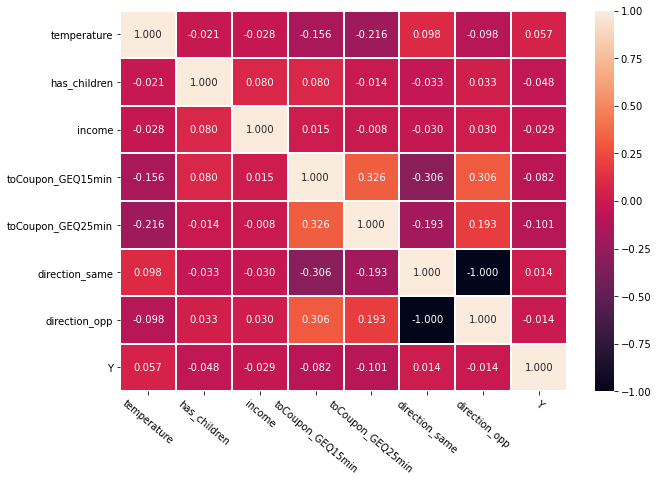

In [63]:
data2=data.drop('toCoupon_GEQ5min',axis=1,inplace=True)
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True, fmt = '.3f', linewidths=1)
plt.xticks(rotation = 320)
plt.savefig('corr.png', dpi=400, bbox_inches='tight')
#Plotting the heatmap of coorelation

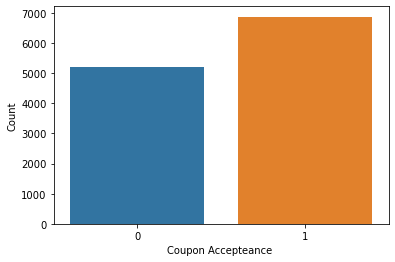

In [64]:
ax = sns.countplot(data=data, x="Y")
plt.xlabel('Coupon Accepteance ')
plt.ylabel('Count')
plt.savefig('couponacceptance.png', dpi=400, bbox_inches='tight')
plt.show()
#Checking the count of Coupon is accepted or not in dataframe

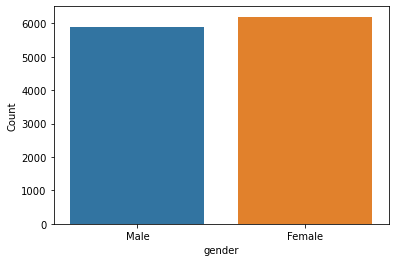

In [65]:
ax = sns.countplot(data=data, x="gender")
plt.xlabel('gender')
plt.ylabel('Count')
plt.savefig('gender.png', dpi=400, bbox_inches='tight')
plt.show()
#checking the gender count in the dataframe

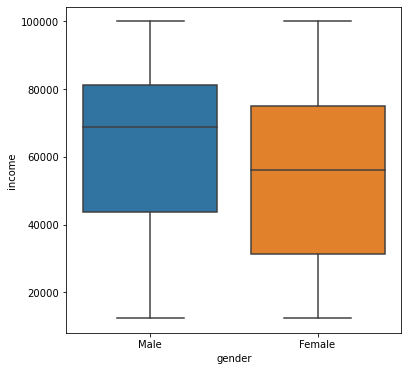

In [66]:

data['age'] = pd.to_numeric(data['age'])
plt.figure(figsize=(6,6))
sns.boxplot(data=data, x='gender', y='income')
plt.savefig("boxplot.png",dpi=400, bbox_inches='tight')
#This graph shows us that males have higher income compared to female counterpart

<Figure size 720x720 with 0 Axes>

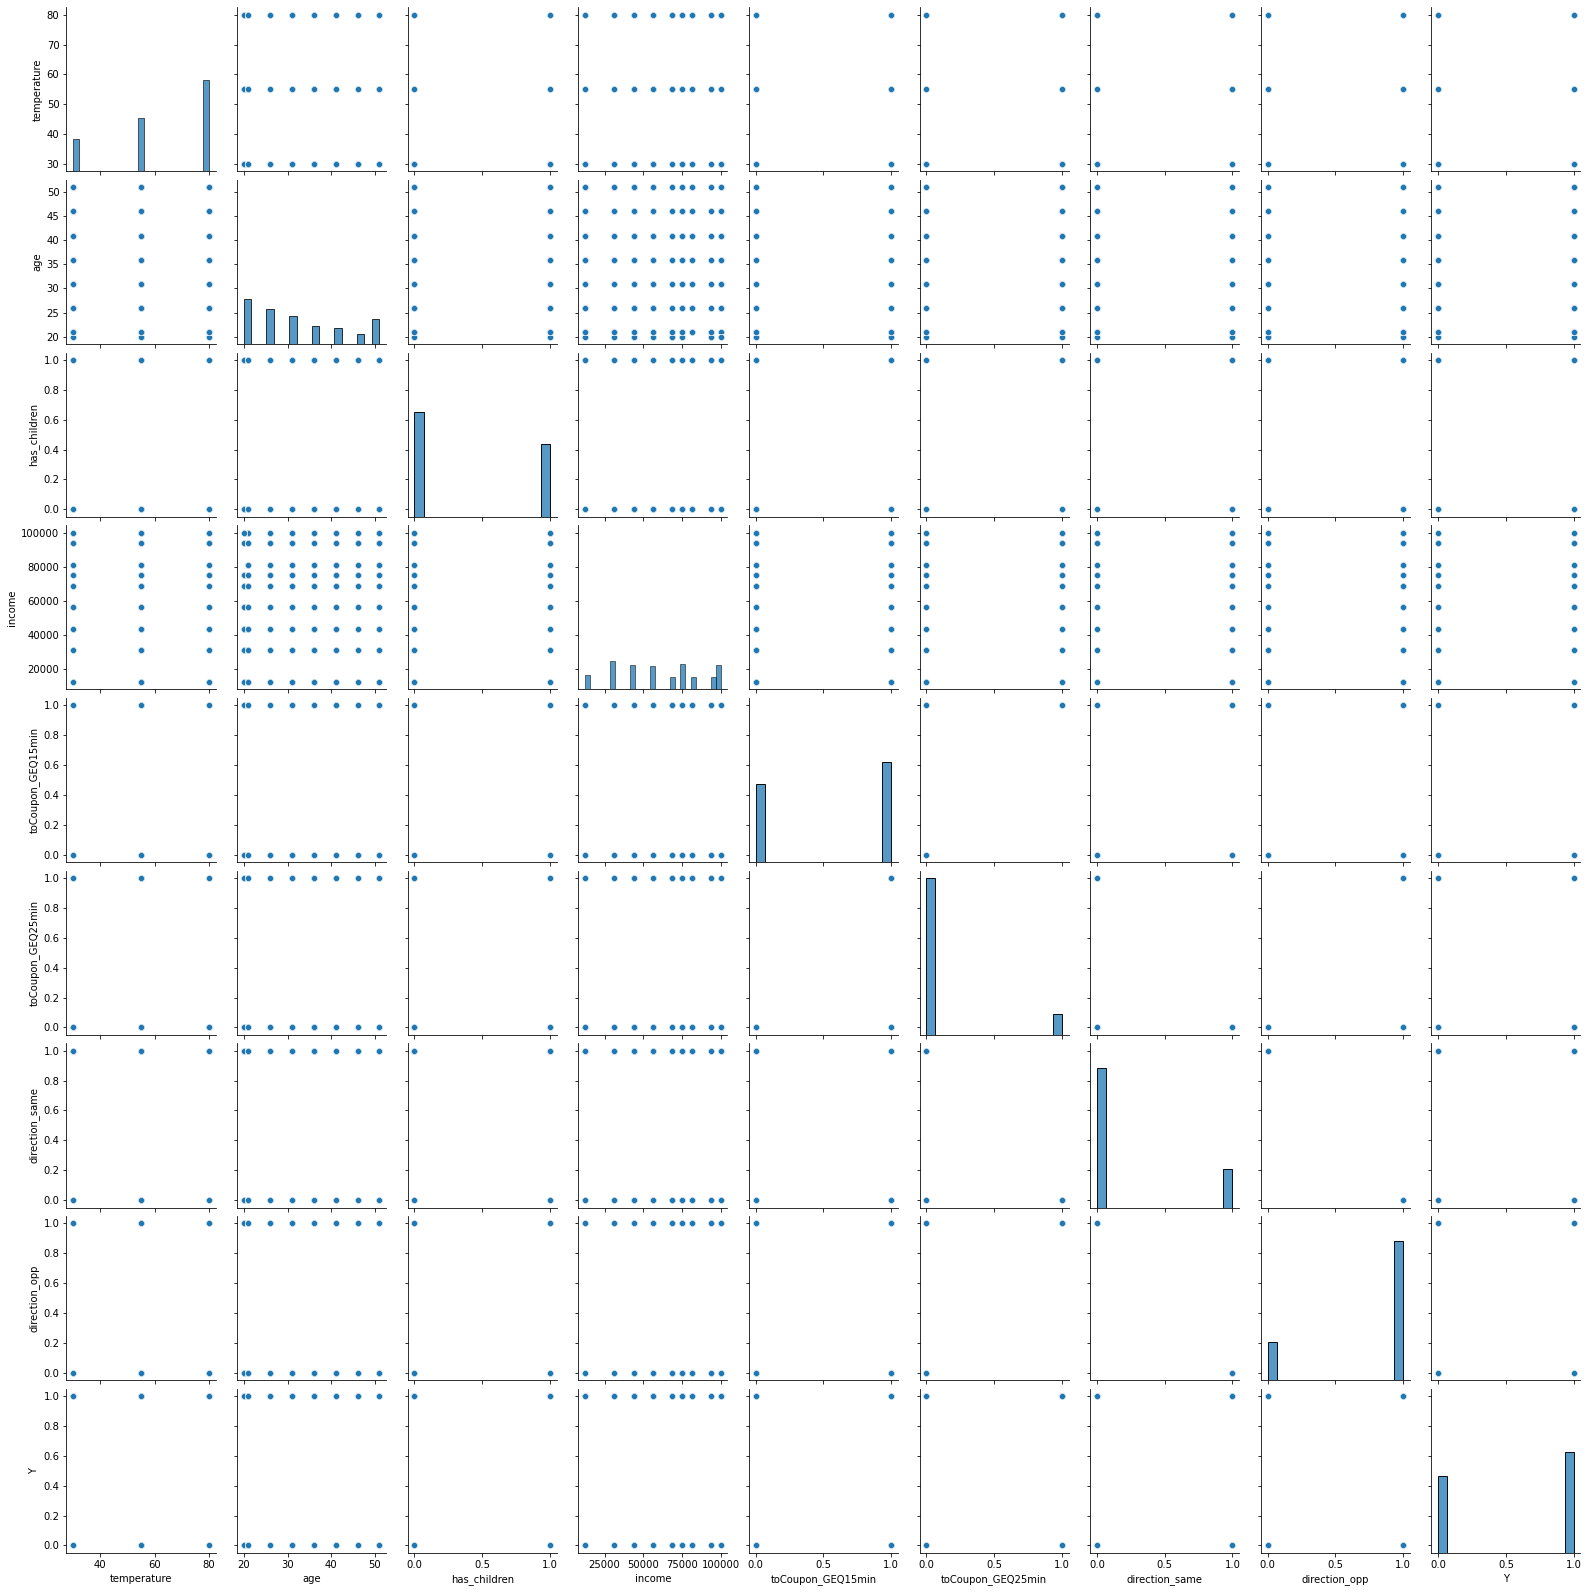

In [67]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(data)
plt.savefig("pairplot.png",dpi=400, bbox_inches='tight')
plt.show()
#Plotting the Pair plot 

## Feature Selection and Classifier modelling 

#### We will be implementing various Feature Selection Methods and then apply Classification Models

## Feature Selection using Select K best

In [68]:
selector=SelectKBest(f_classif,k=30)
x_new=selector.fit_transform(df,response)
selector.get_support()
data_frame=df.iloc[:,selector.get_support()]
featureselection1="Kbest"
#Selecting features using Kbest 

C:\Users\singl\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [5] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\singl\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [69]:
data_frame

,temperature,expiration,age,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,destination_No Urgent Place,destination_Work,passenger_Friends,passenger_Kids,...,maritial_Single,occupation_Healthcare Support,occupation_Retired,Bar_4~8,Bar_never,CoffeeHouse_4~8,CoffeeHouse_never,carryaway_less1,restutant20_50_4~8,restutant20_50_never
0,55,24,21,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,80,2,21,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2,80,24,21,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3,80,2,21,0,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0
4,80,24,21,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,55,24,26,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
12075,55,24,26,0,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
12076,30,24,26,0,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
12077,30,24,26,0,1,1,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0


### Feature Selection using Variance Threshold

In [70]:
vt = VarianceThreshold(threshold = 0.15)
vt.fit(df)
vt.get_support()
pd.DataFrame({'variance':vt.variances_,'select_features':vt.get_support()},index = df.columns)
featureselection2="Variance Threshold"
#Selecting features using Variance Threshold 

In [71]:
df_vthreshold=df.iloc[:,vt.get_support()]

In [72]:
df_vthreshold
#checking the Dataframe

,temperature,expiration,age,has_children,income,toCoupon_GEQ15min,direction_same,direction_opp,destination_No Urgent Place,destination_Work,...,maritial_Single,education_Bachelors degree,occupation_Unemployed,Bar_less1,Bar_never,CoffeeHouse_less1,CoffeeHouse_never,carryaway_4~8,resturant_4~8,restutant20_50_less1
0,55,24,21,0,68749.5,0,0,1,1,0,...,1,1,0,0,1,1,0,1,1,1
1,80,2,21,0,68749.5,0,0,1,1,0,...,1,1,0,0,1,1,0,1,1,1
2,80,24,21,0,68749.5,0,0,1,1,0,...,1,1,0,0,1,1,0,1,1,1
3,80,2,21,0,68749.5,1,0,1,1,0,...,1,1,0,0,1,1,0,1,1,1
4,80,24,21,0,68749.5,0,0,1,1,0,...,1,1,0,0,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,55,24,26,0,81249.5,0,1,0,0,0,...,1,1,0,0,1,0,1,0,1,0
12075,55,24,26,0,81249.5,0,0,1,0,1,...,1,1,0,0,1,0,1,0,1,0
12076,30,24,26,0,81249.5,0,1,0,0,1,...,1,1,0,0,1,0,1,0,1,0
12077,30,24,26,0,81249.5,1,0,1,0,1,...,1,1,0,0,1,0,1,0,1,0


In [73]:
df_vthreshold.dtypes

temperature                                 int64
expiration                                  int64
age                                         int64
has_children                                int64
income                                    float64
toCoupon_GEQ15min                           int64
direction_same                              int64
direction_opp                               int64
destination_No Urgent Place                 uint8
destination_Work                            uint8
passenger_Friends                           uint8
weather_Sunny                               uint8
time_Morning                                uint8
coupon_Carry_out_&_Take_away                uint8
coupon_Coffee_House                         uint8
coupon_Restaurant_Less_than_20_dollars      uint8
gender_Male                                 uint8
maritial_Married partner                    uint8
maritial_Single                             uint8
education_Bachelors degree                  uint8


### Feature Selection using Logistic Regression

In [74]:
method2 = SelectFromModel(estimator=LogisticRegression(max_iter=5000)).fit(df, response)
method2.estimator_.coef_
featureselection3="Logistic Regression"
#Selecting features using Logistic Regression

In [75]:
#cutoff abs(coefficient) value for feature significance
print(method2.threshold_,"\n")

#False = insignificant feature; True = significant fearture
print(method2.get_support())

0.0016580189153968946 

[ True  True  True False False False  True  True False False  True  True
  True False False False False False False  True  True  True  True False
 False False False False False False False False False False False False
 False False False False False False  True False False False  True False
 False False False False False False False False False False False]


In [76]:
df_log = method2.transform(df) #Gives the subset of features to use in analysis
df_log.shape
#Checking the shape of final dataframe

(12079, 14)

### Feature Selection using  Generalized Linear Model (Binomial) from statsmodels

In [77]:
import statsmodels.api as sm
logit_model = sm.GLM(response, df, family=sm.families.Binomial())
result=logit_model.fit(fit_intercept=True)
print(result.summary2())
#Applying GLM model to select features

                           Results: Generalized linear model
Model:                       GLM                     AIC:                   14367.7526 
Link Function:               logit                   BIC:                   -98736.3154
Dependent Variable:          Y                       Log-Likelihood:        -7125.9    
Date:                        2021-08-04 09:50        LL-Null:               -8256.0    
No. Observations:            12079                   Deviance:              14252.     
Df Model:                    57                      Pearson chi2:          1.21e+04   
Df Residuals:                12021                   Scale:                 1.0000     
Method:                      IRLS                                                      
---------------------------------------------------------------------------------------
                                        Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------

In [78]:
result.params >= 0.05
df_glm = df.loc[:, abs(result.params) >= 0.05]
print(df_glm.shape)
df_glm.head()
featureselection4="GLM"

(12079, 49)


### Use Recursive Feature Elimination (RFE)

In [79]:
rfe = RFE(estimator=LogisticRegression(max_iter=5000), n_features_to_select=30, step=1)
rfe_result = rfe.fit(df,response)
print(rfe_result.support_)
print(rfe_result.ranking_)

df_log_eli = df.loc[:, rfe_result.support_]
print(df_log_eli.shape)
df_log_eli.head()
featureselection5="Recursive Elimination RFE"
#Aplying RFE and logistic Regression to select features

[False False False False False False  True False  True  True  True False
 False  True False False  True  True  True  True  True  True  True  True
 False  True False False  True  True  True False  True  True False False
  True False False False  True False  True False  True  True  True False
 False  True  True False False False  True False False  True  True]
[29 24 28 27 30 23  1  9  1  1  1 17  3  1  2 21  1  1  1  1  1  1  1  1
 13  1 20  8  1  1  1 10  1  1 15  7  1 26 12 16  1  4  1 22  1  1  1 19
 14  1  1 25  6  5  1 11 18  1  1]
(12079, 30)


### Applying various Classifier models on the Selected features

### Modelling on Feature Selection using Variance Threshold

In [80]:
feature_sel = []
classifier =[]

names = ["Logistic Regression", "KNN", "Linear SVC","Decision Tree","Naive","Random Forest Classifier","AdaBoost Classifier"
        ,"XGB Classifier","BaggingClassifier","MLP Classifier"]


    
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_vthreshold, response, test_size=0.3, random_state=0)

#Declaring the lists and also breaking the dataset into test and train


In [81]:
clfs = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    LinearSVC(max_iter=100000, C=10),
    DecisionTreeClassifier(max_depth=4),
    GaussianNB(),
    RandomForestClassifier(n_estimators=800, max_leaf_nodes=16, random_state=42),
    AdaBoostClassifier(learning_rate=0.1),
    XGBClassifier(use_label_encoder=False),
    BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=200,max_samples=100,bootstrap=True,random_state=42),
    MLPClassifier(learning_rate='adaptive', max_iter=5000, random_state=42)
    
]
#Declaring the models to be used into single entity so that it can be used via Pipeline

In [82]:
scores = []
names_length = len(names)
for i in range(names_length):
    classifier.append(names[i]);
for i in names:
    feature_sel.append(featureselection2)
for clf in clfs:
    pipe = Pipeline([("scaler", RobustScaler()),("classifier", clf)])
    pipe.fit(X_train1, y_train1)
    score = pipe.score(X_test1, y_test1)
    scores.append(score)
    print(clf)
    print("model score: %.3f" % score)
    print("\n------------------------");
#Iterating through Classifier models using Pipeline and displaying the model score

LogisticRegression()
model score: 0.691

------------------------
KNeighborsClassifier(n_neighbors=3)
model score: 0.680

------------------------
LinearSVC(C=10, max_iter=100000)
model score: 0.690

------------------------
DecisionTreeClassifier(max_depth=4)
model score: 0.666

------------------------
GaussianNB()
model score: 0.669

------------------------
RandomForestClassifier(max_leaf_nodes=16, n_estimators=800, random_state=42)
model score: 0.698

------------------------
AdaBoostClassifier(learning_rate=0.1)
model score: 0.663

------------------------
[09:50:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1

## Classification modelling using Kbest

In [83]:
data_frame.head()
#checking the dataframe

,temperature,expiration,age,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,destination_No Urgent Place,destination_Work,passenger_Friends,passenger_Kids,...,maritial_Single,occupation_Healthcare Support,occupation_Retired,Bar_4~8,Bar_never,CoffeeHouse_4~8,CoffeeHouse_never,carryaway_less1,restutant20_50_4~8,restutant20_50_never
0,55,24,21,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,80,2,21,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2,80,24,21,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3,80,2,21,0,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0
4,80,24,21,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0


In [84]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data_frame, response, test_size=0.3, random_state=0)
#Splitting the dataframe into test and train

In [85]:

for i in range(names_length):
    classifier.append(names[i]);
for i in names:
    feature_sel.append(featureselection1)
for clf in clfs:
    pipe = Pipeline([("scaler", RobustScaler()),("classifier", clf)])
    pipe.fit(X_train1, y_train1)
    score = pipe.score(X_test1, y_test1)
    scores.append(score)
    print(clf)
    print("model score: %.3f" % score)
    print("\n------------------------");
    #Iterating through Classifier models using Pipeline and displaying the model score

LogisticRegression()
model score: 0.688

------------------------
KNeighborsClassifier(n_neighbors=3)
model score: 0.661

------------------------
LinearSVC(C=10, max_iter=100000)
model score: 0.689

------------------------
DecisionTreeClassifier(max_depth=4)
model score: 0.666

------------------------
GaussianNB()
model score: 0.656

------------------------
RandomForestClassifier(max_leaf_nodes=16, n_estimators=800, random_state=42)
model score: 0.694

------------------------
AdaBoostClassifier(learning_rate=0.1)
model score: 0.663

------------------------
[09:51:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1

## Modelling using logistic Regression Feature Selection

In [86]:
df_log.shape
#Checking the dataframe

(12079, 14)

In [87]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_log, response, test_size=0.3, random_state=0)
#Splitting the dataset into test and train

In [88]:
for i in range(names_length):
    classifier.append(names[i]);
for i in names:
    feature_sel.append(featureselection3)
for clf in clfs:
    pipe = Pipeline([("scaler", RobustScaler()),("classifier", clf)])
    pipe.fit(X_train1, y_train1)
    score = pipe.score(X_test1, y_test1)
    scores.append(score)
    print(clf)
    print("model score: %.3f" % score)
    print("\n------------------------");
    #Iterating through Classifier models using Pipeline and displaying the model score

LogisticRegression()
model score: 0.682

------------------------
KNeighborsClassifier(n_neighbors=3)
model score: 0.648

------------------------
LinearSVC(C=10, max_iter=100000)
model score: 0.683

------------------------
DecisionTreeClassifier(max_depth=4)
model score: 0.666

------------------------
GaussianNB()
model score: 0.648

------------------------
RandomForestClassifier(max_leaf_nodes=16, n_estimators=800, random_state=42)
model score: 0.690

------------------------
AdaBoostClassifier(learning_rate=0.1)
model score: 0.660

------------------------
[09:52:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1

## Modelling using glm model Feature Selection

In [89]:
df_glm.head()
#checking the data frame

,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_opp,destination_No Urgent Place,destination_Work,passenger_Friends,passenger_Kids,passenger_Partner,weather_Snowy,...,carryaway_gt8,carryaway_less1,carryaway_never,resturant_gt8,resturant_less1,resturant_never,restutant20_50_4~8,restutant20_50_gt8,restutant20_50_less1,restutant20_50_never
0,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [90]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_glm, response, test_size=0.3, random_state=0)
#splitting the data set into test and train

In [91]:
for i in range(names_length):
    classifier.append(names[i]);
for i in names:
    feature_sel.append(featureselection4)
for clf in clfs:
    pipe = Pipeline([("scaler", RobustScaler()),("classifier", clf)])
    pipe.fit(X_train1, y_train1)
    score = pipe.score(X_test1, y_test1)
    scores.append(score)
    print(clf)
    print("model score: %.3f" % score)
    print("\n------------------------");
#Iterating through Classifier models using Pipeline and displaying the model score

LogisticRegression()
model score: 0.677

------------------------
KNeighborsClassifier(n_neighbors=3)
model score: 0.670

------------------------
LinearSVC(C=10, max_iter=100000)
model score: 0.673

------------------------
DecisionTreeClassifier(max_depth=4)
model score: 0.668

------------------------
GaussianNB()
model score: 0.635

------------------------
RandomForestClassifier(max_leaf_nodes=16, n_estimators=800, random_state=42)
model score: 0.688

------------------------
AdaBoostClassifier(learning_rate=0.1)
model score: 0.657

------------------------
[09:53:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1

### Modelling using glm model Feature Selection

In [92]:
df_log_eli.head()
#Checking the dataframe

,toCoupon_GEQ15min,direction_same,direction_opp,destination_No Urgent Place,passenger_Kids,weather_Sunny,time_Morning,time_Night,coupon_Carry_out_&_Take_away,coupon_Coffee_House,...,Bar_gt8,Bar_never,CoffeeHouse_gt8,CoffeeHouse_less1,CoffeeHouse_never,carryaway_less1,carryaway_never,resturant_never,restutant20_50_less1,restutant20_50_never
0,0,0,1,1,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,1,1,0,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
2,0,0,1,1,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3,1,0,1,1,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
4,0,0,1,1,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0


In [93]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_log_eli, response, test_size=0.3, random_state=0)
#Splitting the dataframe into test and train

In [94]:
for i in range(names_length):
    classifier.append(names[i]);
for i in names:
    feature_sel.append(featureselection5)
for clf in clfs:
    pipe = Pipeline([("scaler", RobustScaler()),("classifier", clf)])
    pipe.fit(X_train1, y_train1)
    score = pipe.score(X_test1, y_test1)
    scores.append(score)
    print(clf)
    print("model score: %.3f" % score)
    print("\n------------------------");
#Iterating through Classifier models using Pipeline and displaying the model score

LogisticRegression()
model score: 0.676

------------------------
KNeighborsClassifier(n_neighbors=3)
model score: 0.663

------------------------
LinearSVC(C=10, max_iter=100000)
model score: 0.674

------------------------
DecisionTreeClassifier(max_depth=4)
model score: 0.668

------------------------
GaussianNB()
model score: 0.640

------------------------
RandomForestClassifier(max_leaf_nodes=16, n_estimators=800, random_state=42)
model score: 0.688

------------------------
AdaBoostClassifier(learning_rate=0.1)
model score: 0.663

------------------------
[09:54:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1

In [95]:
a=len(scores)
a

50

## Final Table after applying all the models via various feature Selection Methods

In [96]:
result = np.vstack((feature_sel,classifier,scores)).T
result_df = pd.DataFrame(result, columns=['Feature Selection','classification method','Accuracy'])
result_df
#Table showing various feature selection methods and accuracy 

,Feature Selection,classification method,Accuracy
0,Variance Threshold,Logistic Regression,0.6906732891832229
1,Variance Threshold,KNN,0.6801876379690949
2,Variance Threshold,Linear SVC,0.6903973509933775
3,Variance Threshold,Decision Tree,0.6663907284768212
4,Variance Threshold,Naive,0.6688741721854304
5,Variance Threshold,Random Forest Classifier,0.6983995584988962
6,Variance Threshold,AdaBoost Classifier,0.6633554083885209
7,Variance Threshold,XGB Classifier,0.7469646799116998
8,Variance Threshold,BaggingClassifier,0.695364238410596
9,Variance Threshold,MLP Classifier,0.7030905077262694


## We conclude that XGB classifier is the best classifier model for the current dataframe using Variance Threshold Feature Selection

## We will proceed towards Hypertuning of the best model using Grid search 

In [97]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
#Declaring the parameter

In [98]:
grid_search = GridSearchCV(
    estimator=XGBClassifier(),
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)
#Applying the Grid Search CV

In [99]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_vthreshold, response, test_size=0.3, random_state=0)
df_vthreshold
grid_search.fit(X_train1, y_train1)
#Splitting the dataset and then aplying grid search CV

Fitting 10 folds for each of 96 candidates, totalling 960 fits


C:\Users\singl\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:05:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None

In [100]:
grid_search.best_estimator_
#Checking the best paramters for XGB classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=180, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [101]:
model=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=180, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
#applying the model with best parameters 

In [102]:
model.fit(X_train1,y_train1)
#fitting the model with best hyperparameters

[10:05:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=180, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [103]:
model.score(X_test1,y_test1)
#checking the model score

0.7461368653421634

In [104]:
y_pred = model.predict(X_test1)

In [105]:
y_pred

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

## Classification Report and Confusion Matrix

### Confusion Matrix

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

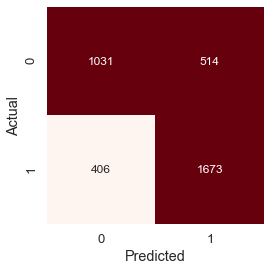

In [106]:
data_cm = confusion_matrix(y_test1, y_pred)
df_cm = pd.DataFrame(data_cm, columns=np.unique(y_test1), index = np.unique(y_test1))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.set(font_scale=1.2)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False,
          vmax=500, square=True, fmt="d", cmap="Reds")# font size
#showing the confusion Matrix

### This confusion matrix shows that We had 1031 True Negatives and 514 False Negatives and also, we had 1673 True positives and 406 false positives 

### Classification Report

In [107]:
print(classification_report(y_test1, y_pred))
#Displaying the classification report

              precision    recall  f1-score   support

           0       0.72      0.67      0.69      1545
           1       0.76      0.80      0.78      2079

    accuracy                           0.75      3624
   macro avg       0.74      0.74      0.74      3624
weighted avg       0.74      0.75      0.74      3624



### ROC Curve

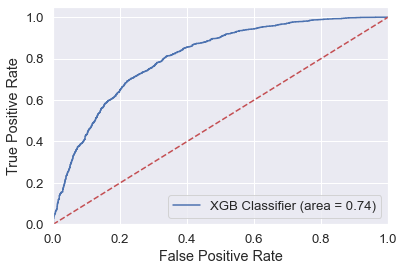

In [108]:
logit_roc_auc = roc_auc_score(y_test1, model.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test1, model.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGB Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig("roc.png",dpi=400, bbox_inches='tight')
plt.show()
#Plotting the ROC Curve  for XGB classifier

### To understand the ROC curve, we can say that the more far the blue line goes from red line, it will indicate a better performance for the classifier model

## Out of Sample Predictions 

In [109]:
df_vthreshold.head(10)
#checking the dataframe used for modelling

,temperature,expiration,age,has_children,income,toCoupon_GEQ15min,direction_same,direction_opp,destination_No Urgent Place,destination_Work,...,maritial_Single,education_Bachelors degree,occupation_Unemployed,Bar_less1,Bar_never,CoffeeHouse_less1,CoffeeHouse_never,carryaway_4~8,resturant_4~8,restutant20_50_less1
0,55,24,21,0,68749.5,0,0,1,1,0,...,1,1,0,0,1,1,0,1,1,1
1,80,2,21,0,68749.5,0,0,1,1,0,...,1,1,0,0,1,1,0,1,1,1
2,80,24,21,0,68749.5,0,0,1,1,0,...,1,1,0,0,1,1,0,1,1,1
3,80,2,21,0,68749.5,1,0,1,1,0,...,1,1,0,0,1,1,0,1,1,1
4,80,24,21,0,68749.5,0,0,1,1,0,...,1,1,0,0,1,1,0,1,1,1
5,80,2,21,0,68749.5,1,0,1,1,0,...,1,1,0,0,1,1,0,1,1,1
6,80,24,21,0,68749.5,1,0,1,1,0,...,1,1,0,0,1,1,0,1,1,1
7,80,24,21,0,68749.5,1,0,1,1,0,...,1,1,0,0,1,1,0,1,1,1
8,80,2,21,0,68749.5,0,0,1,1,0,...,1,1,0,0,1,1,0,1,1,1
9,80,2,21,0,68749.5,1,0,1,1,0,...,1,1,0,0,1,1,0,1,1,1


In [110]:
df_vthreshold['passenger_Friends']

0        0
1        1
2        1
3        1
4        1
        ..
12074    0
12075    0
12076    0
12077    0
12078    0
Name: passenger_Friends, Length: 12079, dtype: uint8

In [111]:
df_vthreshold.dtypes
#Checking the datatypes of the features

temperature                                 int64
expiration                                  int64
age                                         int64
has_children                                int64
income                                    float64
toCoupon_GEQ15min                           int64
direction_same                              int64
direction_opp                               int64
destination_No Urgent Place                 uint8
destination_Work                            uint8
passenger_Friends                           uint8
weather_Sunny                               uint8
time_Morning                                uint8
coupon_Carry_out_&_Take_away                uint8
coupon_Coffee_House                         uint8
coupon_Restaurant_Less_than_20_dollars      uint8
gender_Male                                 uint8
maritial_Married partner                    uint8
maritial_Single                             uint8
education_Bachelors degree                  uint8


In [112]:
# creating test dataset.

test_data = {
                    'temperature' : [60,55,45,82,55],
                    'expiration' : [4,16,12,5,8],
                    'age' : [48,21,24,27,35],
                    'has_children' : [0,1,0,1,1],
                    'income' : [31265,40000,56852,45621,78564],
                    'toCoupon_GEQ15min' : [1,0,1,0,0],
                    'direction_same' : [0,0,1,1,1],
                    'direction_opp ' : [1,1,0,0,0],
                    'destination':['No Urgent Place','No Urgent Place','Work','No Urgent Place','No Urgent Place'],
                    'passenger_type' : ['Friends','Friends','Friends','Friends','Friends'],
                    'weather':['Sunny','Sunny','Sunny','Sunny','Sunny'],
                    'time':['Morning','Morning','Morning','Morning','Morning'],
                    'coupon':['Cofee house','Carry out & Take Away','coupon_Restaurant_Less_than_20_dollars','Cofee house','Cofee house'],
                    'gender':['Male','Male','Male','Male','Male'],
                    'maritalStatus':['Married partner','Single','Single','Single','Single'],
                    'education':['Bachelors degree','Bachelors degree','Bachelors degree','Bachelors degree','Bachelors degree'],
                    'Bar':['never','less1','never','less1','never'],
                    'occupation':['Unemployed','Unemployed','Unemployed','Unemployed','Unemployed'],
                    'CoffeeHouse':['never','less1','never','less1','never'],
                    'RestaurantLessThan20':['4~8','4~8','4~8','4~8','4~8'],
                    'Restaurant20To50':['less1','less1','less1','less1','less1'],
                    'CarryAway':['4~8','4~8','4~8','4~8','4~8']
                    
                
    
            }

test_dataset = pd.DataFrame(test_data)

In [113]:
test_dataset.dtypes

temperature              int64
expiration               int64
age                      int64
has_children             int64
income                   int64
toCoupon_GEQ15min        int64
direction_same           int64
direction_opp            int64
destination             object
passenger_type          object
weather                 object
time                    object
coupon                  object
gender                  object
maritalStatus           object
education               object
Bar                     object
occupation              object
CoffeeHouse             object
RestaurantLessThan20    object
Restaurant20To50        object
CarryAway               object
dtype: object

In [114]:
trans=pd.get_dummies(test_dataset['destination'],prefix='destination')
test_dataset=test_dataset.join(trans)

trans=pd.get_dummies(test_dataset['passenger_type'],prefix='passenger')
test_dataset=test_dataset.join(trans)

trans=pd.get_dummies(test_dataset['weather'],prefix='weather')
test_dataset=test_dataset.join(trans)
trans=pd.get_dummies(test_dataset['time'],prefix='time')
test_dataset=test_dataset.join(trans)
trans=pd.get_dummies(test_dataset['coupon'],prefix='coupon')
test_dataset=test_dataset.join(trans)
trans=pd.get_dummies(test_dataset['gender'],prefix='gender')
test_dataset=test_dataset.join(trans)
trans=pd.get_dummies(test_dataset['maritalStatus'],prefix='maritial')
test_dataset=test_dataset.join(trans)
trans=pd.get_dummies(test_dataset['education'],prefix='education')
test_dataset=test_dataset.join(trans)
trans=pd.get_dummies(test_dataset['occupation'],prefix='occupation')
test_dataset=test_dataset.join(trans)
trans=pd.get_dummies(test_dataset['Bar'],prefix='Bar')
test_dataset=test_dataset.join(trans)
trans=pd.get_dummies(test_dataset['CoffeeHouse'],prefix='CoffeeHouse')
test_dataset=test_dataset.join(trans)
trans=pd.get_dummies(test_dataset['CarryAway'],prefix='carryaway')
test_dataset=test_dataset.join(trans)
trans=pd.get_dummies(test_dataset['RestaurantLessThan20'],prefix='resturant')
test_dataset=test_dataset.join(trans)
trans=pd.get_dummies(test_dataset['Restaurant20To50'],prefix='restutant20_50')
test_dataset=test_dataset.join(trans)


In [115]:
test_dataset.drop('destination',axis=1,inplace=True)
test_dataset.drop('passenger_type',axis=1,inplace=True)
test_dataset.drop('weather',axis=1,inplace=True)
test_dataset.drop('time',axis=1,inplace=True)
test_dataset.drop('coupon',axis=1,inplace=True)
test_dataset.drop('gender',axis=1,inplace=True)
test_dataset.drop('maritalStatus',axis=1,inplace=True)
test_dataset.drop('education',axis=1,inplace=True)
test_dataset.drop('occupation',axis=1,inplace=True)
test_dataset.drop('Bar',axis=1,inplace=True)
test_dataset.drop('CarryAway',axis=1,inplace=True)
test_dataset.drop('RestaurantLessThan20',axis=1,inplace=True)
test_dataset.drop('Restaurant20To50',axis=1,inplace=True)
test_dataset.drop('CoffeeHouse',axis=1,inplace=True)

In [116]:
test_dataset.shape

(5, 28)

In [117]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
scaled_features = rs.fit_transform(test_dataset)
scaled_features
#Applying Robust Scaler on the test dataframe

array([[ 1.        , -0.57142857,  1.90909091, -1.        , -0.85188702,
         1.        , -1.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        , -1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.14285714, -0.54545455,  0.        , -0.33355091,
         0.        , -1.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        , -1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        , -1.        ,  1.        , -1.        ,
         0.        ,  0.        ,  0.        ],
       [-2.        ,  0.57142857, -0.27272727, -1.        ,  0.66644909,
         1.        ,  0.        ,  0.        , -1.        ,  1.        ,
         0.        ,  0.    

In [118]:
prediction_testdata = model.predict(scaled_features)
#Predicting the results on test dataset

In [119]:
prediction_testdata

array([0, 1, 0, 0, 0], dtype=int64)

In [120]:
#define function to display class label
def display_classLabel(out):
    label =''
    if out == 0:
        label ='"Coupon not recommended"'
    else:
        label = '"Coupon Recommended"'
    print('The prediction of driver accepting coupon is ',out,', which means',label)

In [121]:
for i,index in enumerate(prediction_testdata):
    print("Customer",str(i))
    display_classLabel(index)
    print('-----------------')
    

Customer 0
The prediction of driver accepting coupon is  0 , which means "Coupon not recommended"
-----------------
Customer 1
The prediction of driver accepting coupon is  1 , which means "Coupon Recommended"
-----------------
Customer 2
The prediction of driver accepting coupon is  0 , which means "Coupon not recommended"
-----------------
Customer 3
The prediction of driver accepting coupon is  0 , which means "Coupon not recommended"
-----------------
Customer 4
The prediction of driver accepting coupon is  0 , which means "Coupon not recommended"
-----------------
